In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('file.csv')
df

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [3]:
df['Weather'].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [4]:

def std_weather(x):
    if 'Fog' in x and 'Rain' in x:
        return 'FOG+RAIN'
    elif 'Snow' in x and 'Rain' in x:
        return 'SNOW+RAIN'
    elif 'Rain' in x :
        return 'RAIN'
    elif 'Fog' in x:
        return 'FOG'
    elif 'Snow' in x:
        return 'SNOW'
    elif 'Cloudy' in x:
        return 'CLOUDY'
    else :
        return 'CLEAR'



In [5]:
df['Weather_cndtn']=df['Weather'].apply(std_weather)
df


,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Weather_cndtn
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,SNOW
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,SNOW
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,SNOW
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,SNOW


In [6]:
df.drop(columns=['Date/Time','Weather'],inplace=True)

In [7]:
df.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather_cndtn
0,-1.8,-3.9,86,4,8.0,101.24,FOG
1,-1.8,-3.7,87,4,8.0,101.24,FOG
2,-1.8,-3.4,89,7,4.0,101.26,FOG
3,-1.5,-3.2,88,6,4.0,101.27,FOG
4,-1.5,-3.3,88,7,4.8,101.23,FOG


In [31]:
df['Weather_cndtn'].value_counts()

Weather_cndtn
CLOUDY       3797
CLEAR        3501
RAIN          534
SNOW          500
FOG           297
FOG+RAIN      129
SNOW+RAIN      26
Name: count, dtype: int64

In [32]:
# df['Temp (C)'].plot(kind='bar')

In [15]:
df.iloc[:,:-1].corr()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
Temp (C),1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp (C),0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum (%),-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Spd (km/h),-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility (km),0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Stn Press (kPa),-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


<Axes: >

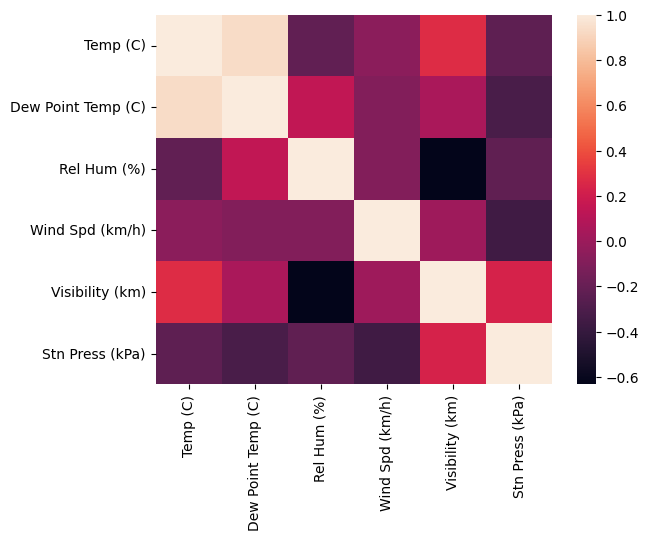

In [19]:
import seaborn as sns
sns.heatmap(df.iloc[:,:-1].corr())

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from imblearn.over_sampling import SMOTE

# Assuming `df` is your DataFrame and 'target' is the target column
X = df.drop('Weather_cndtn', axis=1)  # Replace 'target' with the actual target column name
y = df['Weather_cndtn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42,)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
model.fit(X_train,y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred,y_test))


Confusion Matrix:
[[763 273   3   1   5   6   0]
 [287 821   0   0  22   9   0]
 [  1   0  68  10   1   9   0]
 [  0   0   9  25   2   3   0]
 [ 17  81   0   2  58   2   0]
 [  3  33   4   0   0 109   1]
 [  0   3   1   0   1   2   1]]

Classification Report:
              precision    recall  f1-score   support

       CLEAR       0.71      0.73      0.72      1051
      CLOUDY       0.68      0.72      0.70      1139
         FOG       0.80      0.76      0.78        89
    FOG+RAIN       0.66      0.64      0.65        39
        RAIN       0.65      0.36      0.47       160
        SNOW       0.78      0.73      0.75       150
   SNOW+RAIN       0.50      0.12      0.20         8

    accuracy                           0.70      2636
   macro avg       0.68      0.58      0.61      2636
weighted avg       0.70      0.70      0.70      2636

0.6999241274658573


In [35]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
ypred=sv.predict(X_test)
print(accuracy_score(ypred,y_test))

0.5891502276176024


In [9]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(class_weight='balanced')
model.fit(X_resampled,y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred,y_test))


Confusion Matrix:
[[687 297   1   0  47  19   0]
 [318 666   0   0 110  43   2]
 [  2   0  59  18   1   9   0]
 [  0   0   3  32   2   2   0]
 [ 21  53   3   5  73   2   3]
 [  9  17  11   2   5 103   3]
 [  0   1   0   1   1   3   2]]

Classification Report:
              precision    recall  f1-score   support

       CLEAR       0.66      0.65      0.66      1051
      CLOUDY       0.64      0.58      0.61      1139
         FOG       0.77      0.66      0.71        89
    FOG+RAIN       0.55      0.82      0.66        39
        RAIN       0.31      0.46      0.37       160
        SNOW       0.57      0.69      0.62       150
   SNOW+RAIN       0.20      0.25      0.22         8

    accuracy                           0.62      2636
   macro avg       0.53      0.59      0.55      2636
weighted avg       0.63      0.62      0.62      2636

0.6153262518968133


In [10]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,VotingClassifier
model=AdaBoostClassifier(estimator=DecisionTreeClassifier(),n_estimators=100)
model.fit(X_train,y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred,y_test))


Confusion Matrix:
[[691 325   1   2  20  12   0]
 [290 747   0   0  65  37   0]
 [  5   0  52  19   4   8   1]
 [  2   0   8  21   6   2   0]
 [ 27  62   3   3  61   4   0]
 [ 13  26   7   1   4  97   2]
 [  1   1   1   0   0   3   2]]

Classification Report:
              precision    recall  f1-score   support

       CLEAR       0.67      0.66      0.66      1051
      CLOUDY       0.64      0.66      0.65      1139
         FOG       0.72      0.58      0.65        89
    FOG+RAIN       0.46      0.54      0.49        39
        RAIN       0.38      0.38      0.38       160
        SNOW       0.60      0.65      0.62       150
   SNOW+RAIN       0.40      0.25      0.31         8

    accuracy                           0.63      2636
   macro avg       0.55      0.53      0.54      2636
weighted avg       0.64      0.63      0.63      2636

0.6339150227617603


In [18]:
bgmodel=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100)
bgmodel.fit(X_train,y_train)
# Make predictions on the test set
y_pred = bgmodel.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred,y_test))


Confusion Matrix:
[[754 286   1   1   5   4   0]
 [260 837   0   0  27  15   0]
 [  2   0  69  11   1   6   0]
 [  0   0   7  27   3   2   0]
 [ 15  75   2   3  63   2   0]
 [  4  35   5   0   0 105   1]
 [  0   1   1   0   1   3   2]]

Classification Report:
              precision    recall  f1-score   support

       CLEAR       0.73      0.72      0.72      1051
      CLOUDY       0.68      0.73      0.71      1139
         FOG       0.81      0.78      0.79        89
    FOG+RAIN       0.64      0.69      0.67        39
        RAIN       0.63      0.39      0.48       160
        SNOW       0.77      0.70      0.73       150
   SNOW+RAIN       0.67      0.25      0.36         8

    accuracy                           0.70      2636
   macro avg       0.70      0.61      0.64      2636
weighted avg       0.70      0.70      0.70      2636

0.7044764795144158


In [14]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# dt=DecisionTreeClassifier(max_depth=10)
# lr=LogisticRegression(solver='saga')
# kn=KNeighborsClassifier(n_jobs=-1,n_neighbors=10)
# estimator=[dt,lr,kn]
# model=VotingClassifier(estimators=estimator)
# model.fit(X_train,y_train)
# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))
# print(accuracy_score(y_pred,y_test))


In [19]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(bgmodel,f)

In [23]:
X_train.columns

Index(['Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)'],
      dtype='object')